In [0]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier


In [0]:
train=pd.read_csv('/content/online_and_mail_shopping.csv')

In [0]:
train.tail()

,month,mdollars
101,2010-06,20787
102,2010-07,19659
103,2010-08,21369
104,2010-09,21115
105,2010-10,21196


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,BatchNormalization
from sklearn.preprocessing import MinMaxScaler

In [0]:
data=train['mdollars']

In [0]:
data=np.array(data).reshape(-1,1)

sc=MinMaxScaler()

data=sc.fit_transform(data)

In [0]:
def get_data(data,lookback):
    datax,datay=[],[]
    for i in range(len(data)-lookback-1):
      a=data[i:(i+lookback),0]
      datax.append(a)
      datay.append(data[i+lookback])
    return np.array(datax),np.array(datay)

In [0]:
lookback=1
xtrain,ytrain=get_data(data,lookback)

In [0]:
xtrain.shape

(104, 1)

In [0]:
X_train=xtrain.reshape(104,1,1)

In [0]:
X_train.shape

(104, 1, 1)

In [0]:
model=Sequential()
model.add(LSTM(5,input_shape=(1,lookback)))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

model.fit(X_train,ytrain,epochs=200, batch_size=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





104/104 [==============================] - 6s 58ms/step - loss: 0.1088
Epoch 2/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0538
Epoch 3/200
104/104 [==============================] - 1s 6ms/step - loss: 0.0332
Epoch 4/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0283
Epoch 5/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0264
Epoch 6/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0246
Epoch 7/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0231
Epoch 8/200
104/104 [==============================] - 1s 6ms/step - loss: 0.0217
Epoch 9/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0205
Epoch 10/200
104/104 [==============================] - 1s 7ms/step - loss: 0.0192
Epoch 11/200
104/104 [==============================] - 1s 7ms/step - lo

In [0]:
test=pd.read_csv('/content/y.csv')

In [0]:
test.head()

,2010-11,25030
0,2010-12,32619
1,2011-01,22041
2,2011-02,20503
3,2011-03,23622
4,2011-04,21772


In [0]:
data_test=test['25030']

In [0]:
data_test=np.array(data_test).reshape(-1,1)

data_test=sc.fit_transform(data_test)

lookback=1
xtest,ytest=get_data(data_test,lookback)


In [0]:
xtest.shape

(35, 1)

In [0]:
xtest=xtest.reshape(35,1,1)


In [0]:
pred=model.predict(xtest)

pred = sc.inverse_transform(pred)

In [0]:
ytest = np.array(ytest)
ytest = ytest.reshape(-1, 1)
ytest = sc.inverse_transform(ytest)

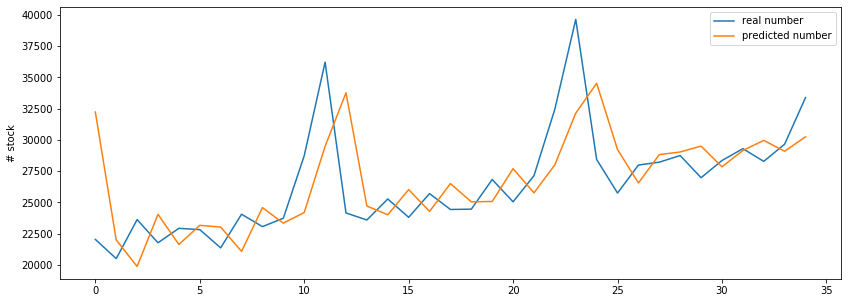

In [0]:
plt.figure(figsize=(14,5))
plt.plot(ytest, label = 'real number ')
plt.plot(pred, label = 'predicted number')
plt.ylabel('# stock')
plt.legend()
plt.show()